In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from math import sin, sqrt, pi

Two non-interacting particles from Hinchliffe, pages 182 to 184

In [4]:
class TwoNonInteractingInABox:
    def __init__(self, mass, length):
        self.mass = mass
        self.length = length
    
    def wavefunction(self, na, nb, xa, xb):
        return 2 / self.length * sin(na * pi * xa / self.length) * sin(nb * pi * xb / self.length)
    
    def symmetric(self, na, nb, xa, xb):
        return sqrt(0.5) * (self.wavefunction(na, nb, xa, xb) + self.wavefunction(nb, na, xa, xb))
    
    def antisymmetric(self, na, nb, xa, xb):
        return sqrt(0.5) * (self.wavefunction(na, nb, xa, xb) - self.wavefunction(nb, na, xa, xb))
    
    def sq_wavefunction(self, na, nb):
        points = 100
        xas = np.linspace(0.0, self.length, points)
        xbs = np.linspace(0.0, self.length, points)
        zs = np.zeros((points, points), np.float64)
        for ixa, xa in enumerate(xas):
            for ixb, xb in enumerate(xbs):
                zs[ixa, ixb] = self.antisymmetric(na, nb, xa, xb) ** 2
        return xas, xbs, zs

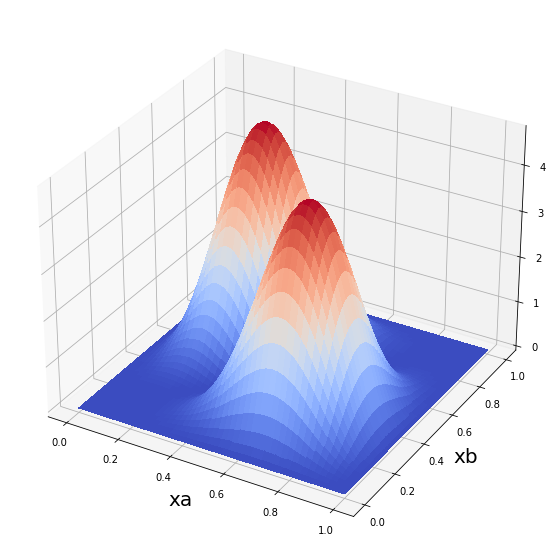

In [5]:
box = TwoNonInteractingInABox(mass=1.0, length=1.0)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10), subplot_kw={"projection": "3d"})
xs, ys, zs = box.sq_wavefunction(na=1, nb=2)
xs, ys = np.meshgrid(xs, ys)
ax.set_xlabel('xa', size=20)
ax.set_ylabel('xb', size=20)
ax.plot_surface(ys, xs, zs, cmap=cm.coolwarm, linewidth=0, antialiased=False)